<a href="https://colab.research.google.com/github/viriditass/Paper-Review/blob/main/BERT_Pre_training_of_Deep_Bidirectional_Transformers_for_Language_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding**

논문 링크: https://arxiv.org/abs/1810.04805

해당 논문은 구글에서 발표한 **BERT**(**B**idirectional **E**ncoder **R**epresentations from **T**ransformer) 논문이다.

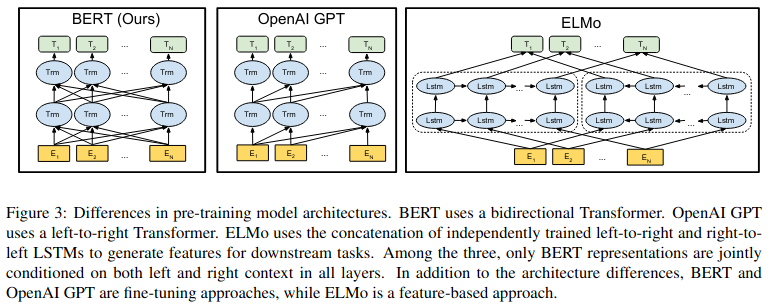

language model을 pre-training하는 것은 여러 NLP task에 대해 성능을 향상 시킬 수 있다. 이러한 pre-trained langauge representation을 적용하는 방식은 크게 두 가지 방식이 있는데, 첫 번째는 **feature-based**이고 두 번째는 **fine-tuning** 방식이다.

- **feature-based approach**: 특정 task를 수행하는 network에 pre-trained language representation을 추가적인 feature로 제공하는 방식(=즉, 두 개의 network를 붙여 사용 Ex. ELMo)
- **fine-tuning approach**: task-specific한 parameter를 최대한 줄이고, pre-trained된 parameter들을 downstream task로 train을 시키는 방식(Ex. GPT)

그러나, ELMo나 GPT과 같은 기존 방법은 큰 한계점이 있었다. 이들은 모두 일반적인 language model로 앞의 n개의 단어를 가지고 뒤의 단어를 예측하는 것(=n-gram)인데, 이는 **필연적으로 unidirectional**하다.(=앞의 단어 => 뒤의 단어 이런식으로만 학습되기 때문)

ELMo는 이를 해결하기 위해 Bi-LSTM을 사용했지만 굉장히 shallow한 양방향성을 가지게 됬다.(단방향 concat 단방향)

따라서, BERT는 새로운 pre-trained Language Representation 방식을 제안한다.

## **BERT**

BERT는 Transformer의 encoder 부분만을 사용하며, pre-training과 fine-tuning시에 achitecture를 조금 다르게 하여 transfer learning을 시킨다. 또한, model의 size에 따라 **BERT_base**와 **BERT_large**로 구분된다.

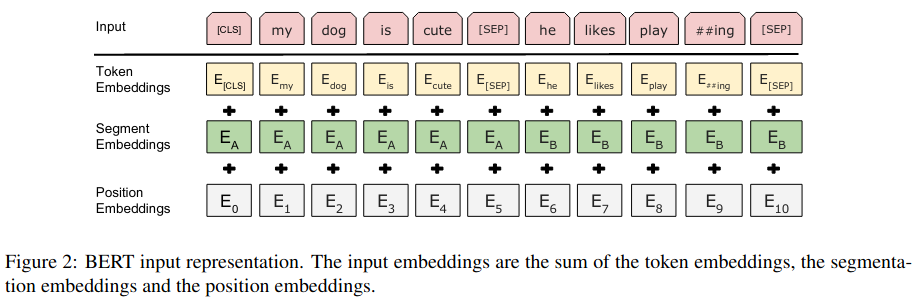

다음으로는 BERT의 input에 대해 알아보겠다. BERT의 input은 위의 그림 Figure 2와 같이 3가지 embedding 값의 합으로 이루어져 있다. 또한, 특징은 아래와 같다.
- **WordPiece Embedding**을 사용한다. english model의 경우 30000개의 token을 사용했다.
- Transformer에서 사용했던 **Position Embedding**을 같은 방식으로 사용한다.
- **classification task에서 모든 setence의 첫 번째 token은 항상 [CLS](special classification token)이다.** 이 [CLS] token은 transformer를 다 통과하고 나면 token sequence의 결합된 의미를 가지게 되는데, 여기에 간단한 classifier를 붙이면 단일 sentense 혹은 연속된 sentense의 classification을 쉽게 할 수 있다.
- **Sentense pair은 합쳐져 single sequence로 input**된다. 각각의 sentence는 실제론 수 개의 sentence로 이루어져 있을 수 있다. 그래서 **두 개의 문장을 구분하기 위해 [SEP] token을 사용**하고, **Segment embedding을 사용해 앞 문장에는 "sentence A embedding", 뒷 문장에는 "sentence B embedding"을 더해준다.**
- 만일, sentense가 single이라면 "sentence A embedding"만 사용한다.

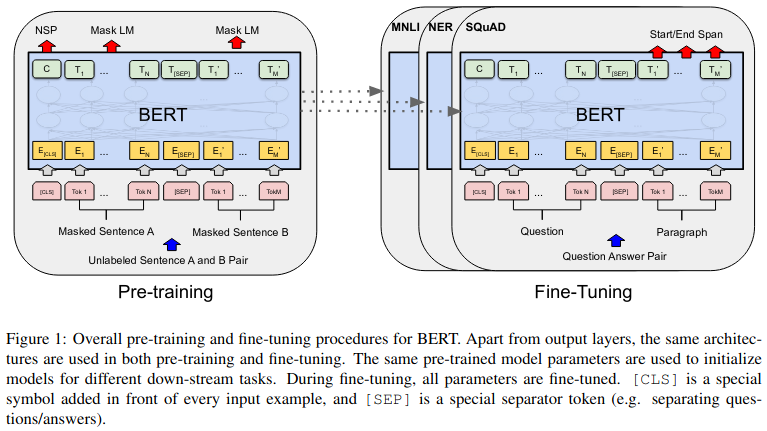

BERT의 새로운 pre-training 방법은 크게 두 가지로 나눌 수 있다. 첫 번째는 **MLM(Masked Language Model)**이고, 두 번째는 **NSP(Next Sentence Prediction)**이다.

1. **MLM**: **input에서 무작위하게 몇 개의 token을 mask 시킨다. 그리고 Transformer에 넣어 주변 단어의 context만 보고 mask된 단어를 예측한다.** (GPT에서도 Transformer를 사용하지만, 앞의 단어를 보고 뒤의 단어를 예측하는 decoder 구조를 사용한다. 반면 BERT에서는 encoder를 통해 input과 mask된 token을 한번에 예측하므로 **deep bidirectional**하다.
2.**NSP**: **두 sentence를 pre-training시에 같이 넣어줘 두 sentence가 이어지는 문장인지 아닌지를 맞춘다.** pre-training 시에 50:50 비율로 실제로 이어지는 두 sentence와 랜덤하게 추출된 두 sentence를 넣어 BERT가 맞춘다.

### **Masked LM**

앞서 설명한 것을 좀 더 보충하자면, 단어 중 일부를 [MASK] token으로 바꿔주는데 이때 비율은 **15%**이다. WordPiece Embedding으로 tokenization을 하고, 이를 통해 LM(left-to-right 혹은 right-to-left) 방식이 아닌 [MASK] token만 predict하는 pre-training task를 수행한다. 이 [MASK] token은 **pre-training에만 사용**한다. (fine-tunning 시에는 사용하지 않음.)

15%의 [MASK] token을 만들때, 추가적인 처리를 해주는데, 이 중
- 80%는 token을 단순 [MASK]로 바꿔준다. (Ex. I am cute => I am [MASK])
- 10%는 token을 random word로 바꿔준다. (Ex. I am cute => I am cat)
- 10%는 token을 원래 단어 그대로 둔다. (Ex. I am cute => I am cute)

random word로 바꿔도 15%의 10%이므로 고작 1.5% 밖에 되지 않아 language understanding 능력에 악영향을 끼치지 않는다.

### **Next Sentence Prediction**

NSP도 좀 더 보충 설명을 하자면, 여러 NLP task들에서 **QA**나 **NLI(Natural Language Inference)**와 같이 두 sentence 사이의 관계를 이해하는 것이 중요하기 때문이다. 따라서 BERT에서 두 sentence를 이어 붙여 이것이 원래 corpus에서 바로 이어 붙여져 있던 sentence인지를 맞추는 **binarized next sentence prediction task**를 수행한다.

- 50% 확률로 sentence A, B가 실제 next sentence이고,
- 50% 확률로 sentence A, B가 corpus에서 random하게 뽑힌 두 sentence이다.

### **Pre-training Procedure**

pre-training의 기본적인 절차는 LM에서 수행하는 것과 동일하다.

먼저, NSP를 위해 sentence를 뽑아 embedding A와 B를 만들어 준다. 이 모든 token이 합쳐진 길이는 OOM(Out of Memory) 때문에 512개 이하여야 한다. 이후에 masking 작업을 해준다.

추가적으로 hyper-parameter의 경우, batch_size는 256, optimizer는 adam, dropout 0.1, activation function으로 gelu를 사용했다.

### **Fine-tunning Procedure**

**sequence-level classification task**에 대해서는 fine-tuning 과정이 매우 직관적이다.
1. input sequence에 대해 일정한 차원수의 representation 결과를 얻고 싶기 때문에, [CLS]의 Transformer output 값을 사용한다. (**[CLS] token vector C ∈ R^H**)
2. classify하고 싶은 갯수 k에 따라 classification layer를 붙여준다. (**W ∈ R^(K×H)**)
3. label probabilies는 standard softmax로 계산된다. (**p = softmax(CW^T**)
4. W matrix와 BERT의 모든 parameter가 같이 fine-tuning된다.

**span-level / token-lavel prediction task**

batch_size가 (16, 32) lr이 (5e-5, 3e-5, 2e-5), epoch가 (3, 4)인 점을 제외하고선 나머지 hyper-parameter가 pre-training때와 동일하다

## **Experiments**

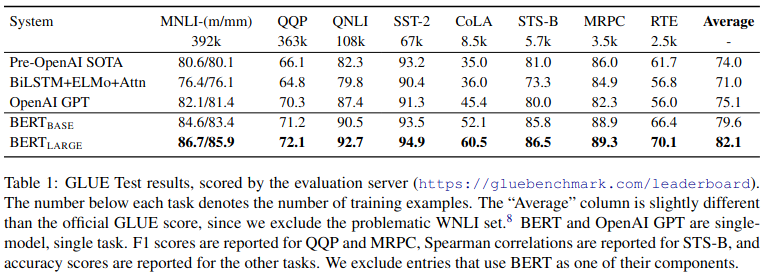